In [ ]:
import os
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, VotingClassifier
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, roc_curve
import matplotlib.pyplot as plt
import seaborn as sns

os.makedirs("Outputs", exist_ok=True)

data = pd.read_csv("/content/drive/MyDrive/EDA_UScitizens/adult_eda.csv")


data.head()



,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,salary
0,39,State-gov,77516,Bachelors,13.0,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13.0,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9.0,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7.0,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13.0,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [ ]:
data.info()
data.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             32561 non-null  int64  
 1   workclass       32561 non-null  object 
 2   fnlwgt          32561 non-null  int64  
 3   education       32561 non-null  object 
 4   education-num   31759 non-null  float64
 5   marital-status  32561 non-null  object 
 6   occupation      32561 non-null  object 
 7   relationship    27493 non-null  object 
 8   race            32561 non-null  object 
 9   sex             32561 non-null  object 
 10  capital-gain    32561 non-null  int64  
 11  capital-loss    32561 non-null  int64  
 12  hours-per-week  32561 non-null  int64  
 13  native-country  32561 non-null  object 
 14  salary          32561 non-null  object 
dtypes: float64(1), int64(5), object(9)
memory usage: 3.7+ MB


,age,fnlwgt,education-num,capital-gain,capital-loss,hours-per-week
count,32561.000000,3.256100e+04,31759.000000,32561.000000,32561.000000,32561.000000
mean,38.581647,1.897784e+05,10.082843,1077.648844,87.303830,40.437456
std,13.640433,1.055500e+05,2.576172,7385.292085,402.960219,12.347429
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.178270e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.783560e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.370510e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.484705e+06,16.000000,99999.000000,4356.000000,99.000000


In [ ]:

data.columns

Index(['age', 'workclass', 'fnlwgt', 'education', 'education-num',
       'marital-status', 'occupation', 'relationship', 'race', 'sex',
       'capital-gain', 'capital-loss', 'hours-per-week', 'native-country',
       'salary'],
      dtype='object')

In [ ]:
data.describe()

#### Basic Distributions

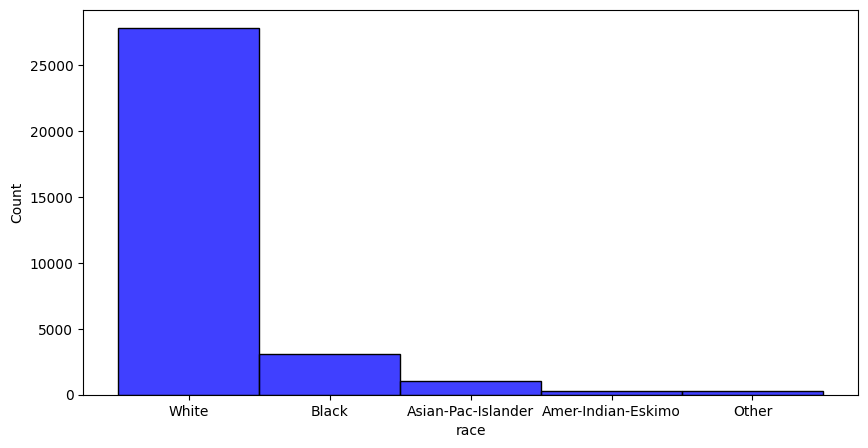

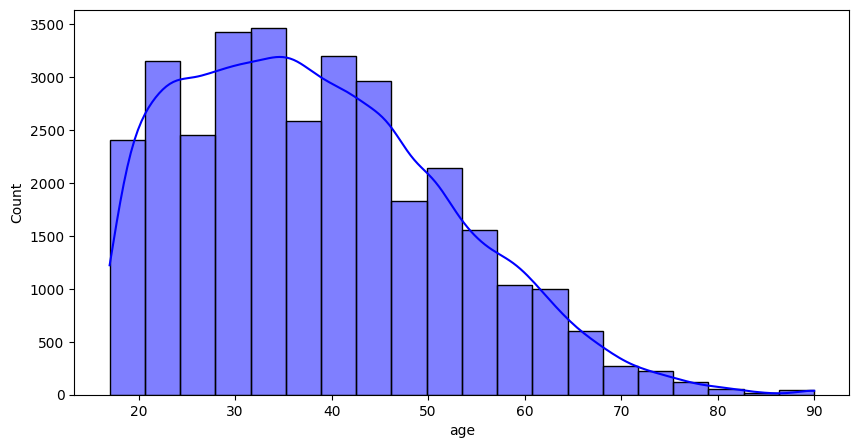

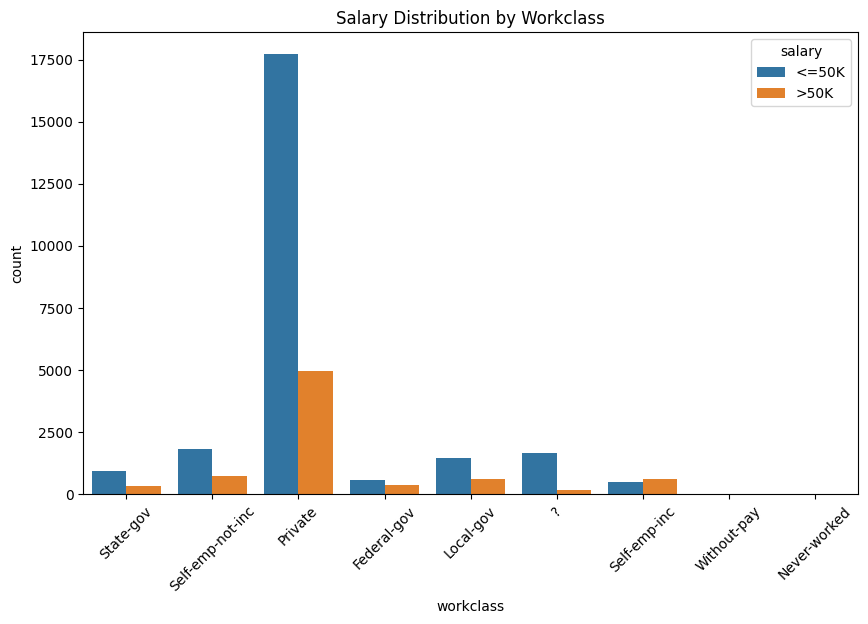

In [ ]:
#distributions of race, age, salary by working class
plt.figure(figsize=(10, 5))
sns.histplot(data['race'], bins=30, color='blue')
plt.show()

plt.figure(figsize=(10, 5))
sns.histplot(data['age'],  kde=True, bins=20, color='blue')
plt.show()

#Salary distribution by workclass
plt.figure(figsize=(10, 6))
sns.countplot(x='workclass', hue='salary', data=data)
plt.title('Salary Distribution by Workclass')
plt.xticks(rotation=45)
plt.show()


#### Handling Values

In [ ]:
#removing duplicates
data.duplicated().value_counts()

,count
False,32537


In [ ]:
data.drop_duplicates(keep = 'first', inplace=True)

In [ ]:
data.columns

Index(['age', 'workclass', 'fnlwgt', 'education', 'education_num',
       'marital_status', 'occupation', 'relationship', 'race', 'gender',
       'capital_gain', 'capital_loss', 'hours_per_week', 'native_country',
       'salary'],
      dtype='object')

In [ ]:
data.rename(columns = {"education-num" : "education_num",
                       "marital-status" : "marital_status",
                       "hours-per-week" : "hours_per_week",
                       "native-country" : "native_country",
                       "capital-loss" : "capital_loss",
                       "capital-gain" : "capital_gain",
                       "sex" : "gender"},
            inplace = True)

In [ ]:
data.isnull().sum() / data.shape[0] * 100

,0
age,0.000000
workclass,0.000000
fnlwgt,0.000000
education,0.000000
education_num,2.464886
marital_status,0.000000
occupation,0.000000
relationship,15.563820
race,0.000000
gender,0.000000


In [ ]:
object_col = data.select_dtypes(include='object').columns
object_col

Index(['workclass', 'education', 'marital_status', 'occupation',
       'relationship', 'race', 'gender', 'native_country', 'salary'],
      dtype='object')

In [ ]:
for col in object_col:
    print(col)
    print("--"*8)
    print(data[col].value_counts(dropna=False))
    print("--"*20)


workclass
----------------
workclass
Private             22673
Self-emp-not-inc     2540
Local-gov            2093
?                    1836
State-gov            1298
Self-emp-inc         1116
Federal-gov           960
Without-pay            14
Never-worked            7
Name: count, dtype: int64
----------------------------------------
education
----------------
education
HS-grad         10494
Some-college     7282
Bachelors        5353
Masters          1722
Assoc-voc        1382
11th             1175
Assoc-acdm       1067
10th              933
7th-8th           645
Prof-school       576
9th               514
12th              433
Doctorate         413
5th-6th           332
1st-4th           166
Preschool          50
Name: count, dtype: int64
----------------------------------------
marital_status
----------------
marital_status
Married-civ-spouse       14970
Never-married            10667
Divorced                  4441
Separated                 1025
Widowed                    993
Marr

In [ ]:
data[data.isin(['?'])].any() #to undertand where there are missing values

,0
age,False
workclass,True
fnlwgt,False
education,False
education_num,False
marital_status,False
occupation,True
relationship,False
race,False
gender,False


## Analysing Numerical Values First

### Salary

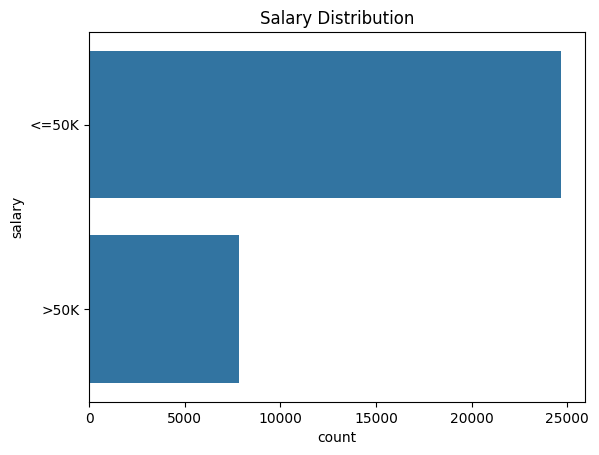

salary
<=50K    75.907428
>50K     24.092572
Name: proportion, dtype: float64


In [ ]:
#"salary"
data.salary.value_counts()
sns.countplot(data.salary) #understanding the distribution of salary
plt.title("Salary Distribution")
plt.show()

#percentage of salary distribution
salary_percentage = data.salary.value_counts(normalize=True) * 100
print(salary_percentage)


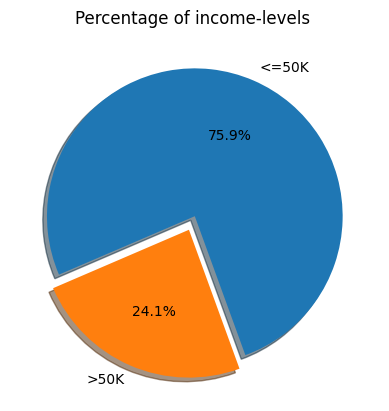

In [ ]:
#salary percentage Visual
plt.pie(salary_percentage, labels=salary_percentage.index, autopct='%1.1f%%',
        explode=(0, 0.1), shadow=True, startangle=290)
plt.title('Percentage of income-levels ')
plt.show()

RESULT: 75.9% of people earn less than or equal to 50,000 annually,  while 24.1 percent of people in the dataset earn more than 50,000 annually.

### Numeric : Age
Boxplot, Distribution, stats values

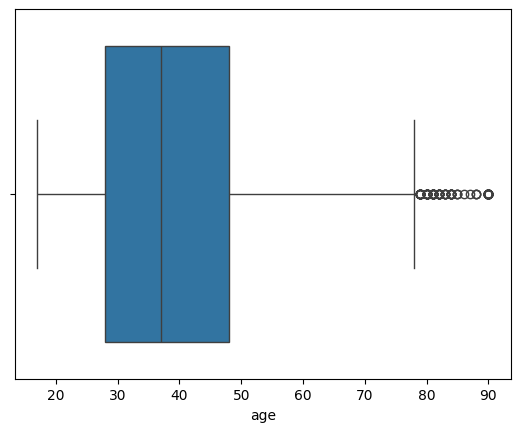

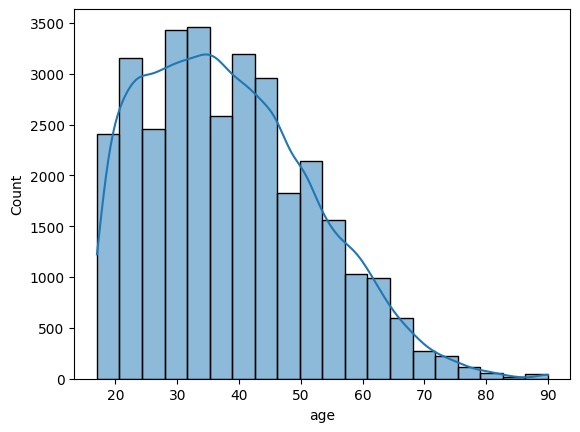

,age
count,32537.000000
mean,38.585549
std,13.637984
min,17.000000
25%,28.000000
50%,37.000000
75%,48.000000
max,90.000000


In [ ]:
#age
sns.boxplot(x=data.age)
plt.show()

sns.histplot(data.age, bins=20, kde=True)
plt.show()

data.age.describe()

### Checking Age by Salary

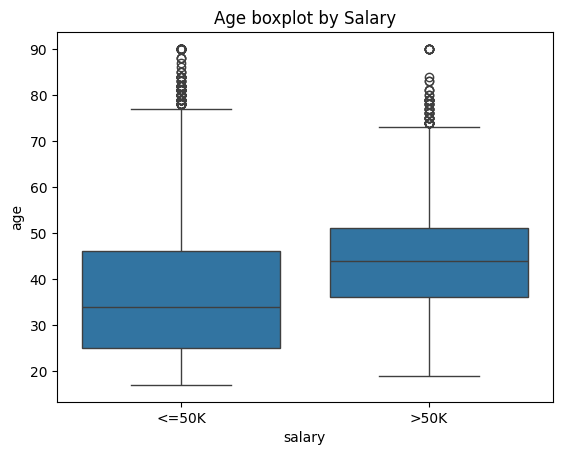

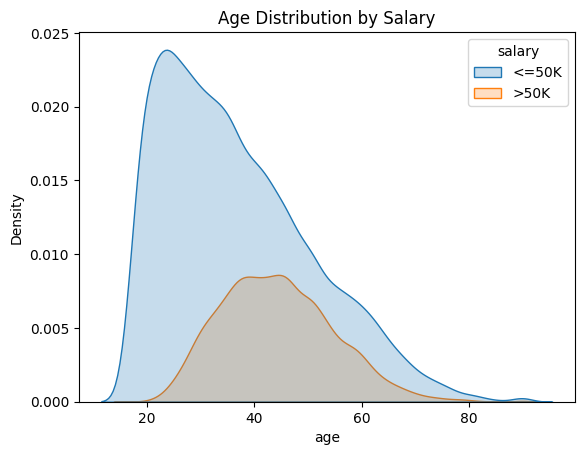

,count,mean,std,min,25%,50%,75%,max
salary,,,,,,,,
<=50K,24698.0,36.787392,14.017335,17.0,25.0,34.0,46.0,90.0
>50K,7839.0,44.250925,10.520102,19.0,36.0,44.0,51.0,90.0


In [ ]:
sns.boxplot(x=data.salary, y=data.age)
plt.title("Age boxplot by Salary")
plt.show()

'''sns.histplot(x=data.age, hue=data.salary, bins=20, kde=True)
plt.title("Age Distribution by Salary")
plt.show()'''

sns.kdeplot(x=data.age, hue=data.salary, fill=True)
plt.title("Age Distribution by Salary")
plt.show()

data.groupby('salary')['age'].describe()


In [ ]:
data.head()

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,gender,capital_gain,capital_loss,hours_per_week,native_country,salary
0,39,State-gov,77516,Bachelors,13.0,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13.0,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9.0,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7.0,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13.0,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


#### RESULT: The mean and median age of the high-income group is higher than the low-income group. It means the older generation possesses more wealth than the young.

### Numeric : Capital Gain

Comparing it with salary

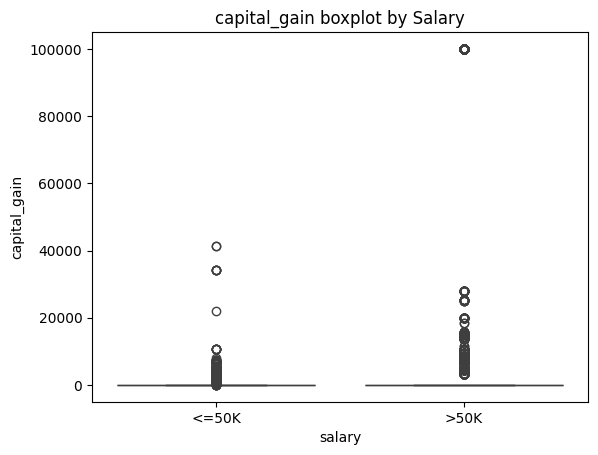

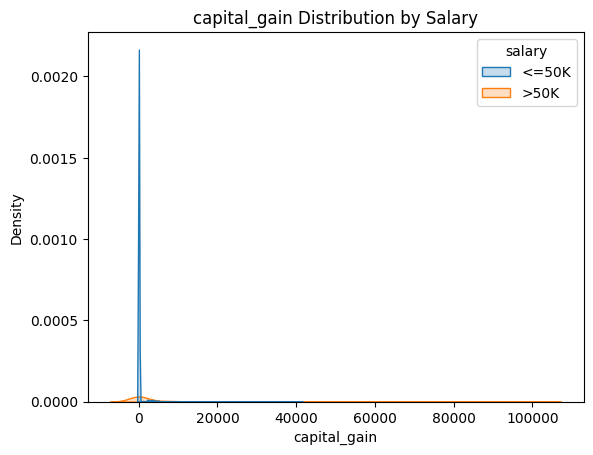

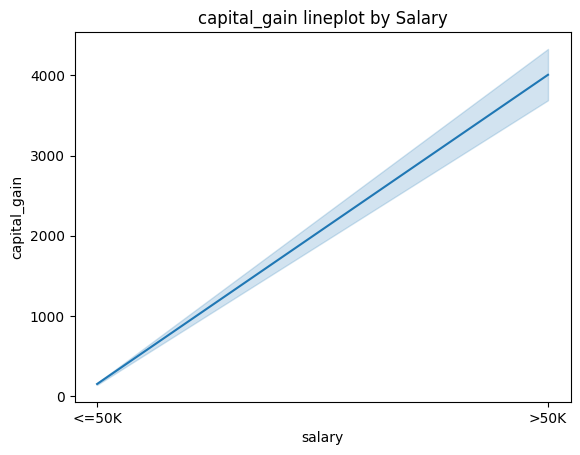

In [ ]:
sns.boxplot(x=data.salary, y=data.capital_gain)
plt.title("capital_gain boxplot by Salary")
plt.show()

'''sns.histplot(x=data.age, hue=data.salary, bins=20, kde=True)
plt.title("Age Distribution by Salary")
plt.show()'''

sns.kdeplot(x=data.capital_gain, hue=data.salary, fill=True)
plt.title("capital_gain Distribution by Salary")
plt.show()

sns.lineplot(x=data.salary, y=data.capital_gain)
plt.title("capital_gain lineplot by Salary")
plt.show()

#### RESULT: From these visualisations, I can see that the higher the salary the higher the capital gain.

### Numeric: Capital loss
Comparing it with salary

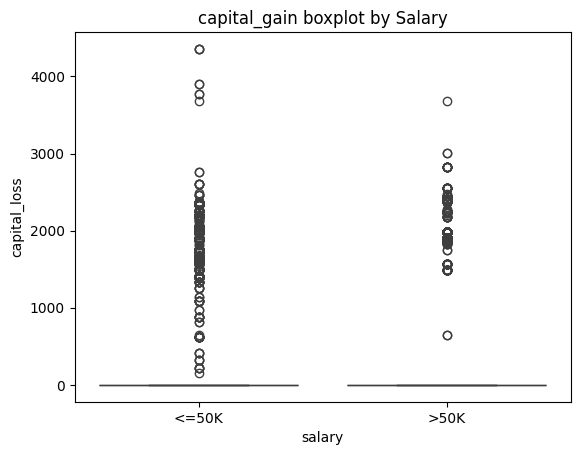

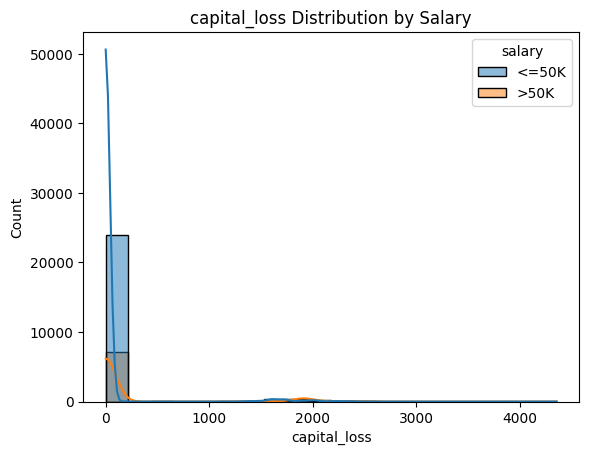

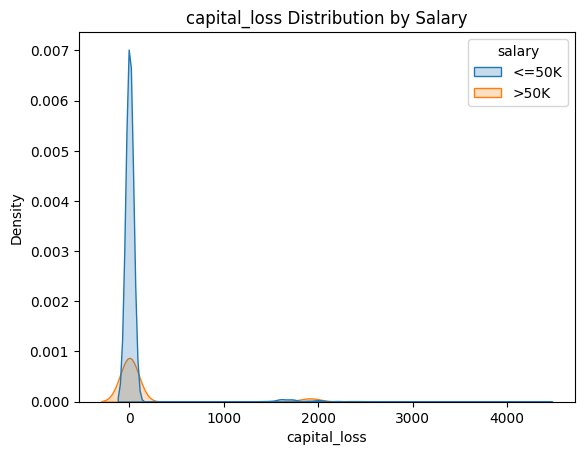

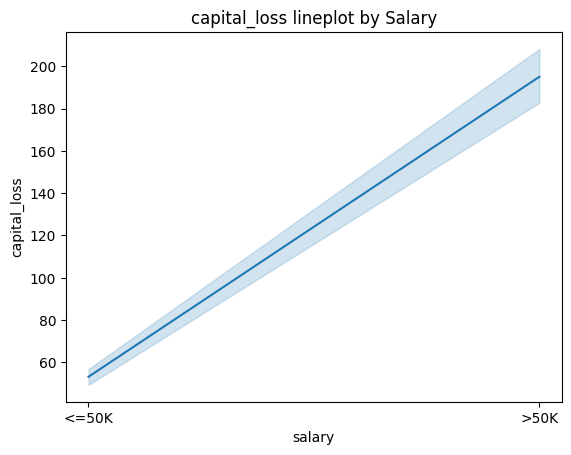

In [ ]:
sns.boxplot(x=data.salary, y=data.capital_loss)
plt.title("capital_gain boxplot by Salary")
plt.show()

sns.histplot(x=data.capital_loss, hue=data.salary, bins=20, kde=True)
plt.title("capital_loss Distribution by Salary")
plt.show()

sns.kdeplot(x=data.capital_loss, hue=data.salary, fill=True)
plt.title("capital_loss Distribution by Salary")
plt.show()

sns.lineplot(x=data.salary, y=data.capital_loss)
plt.title("capital_loss lineplot by Salary")
plt.show()

#### RESULT: From these visualisations, I can see that the higher the salary the higher the capital loss.

In [ ]:
data.head()

### Numeric: Hours per Week


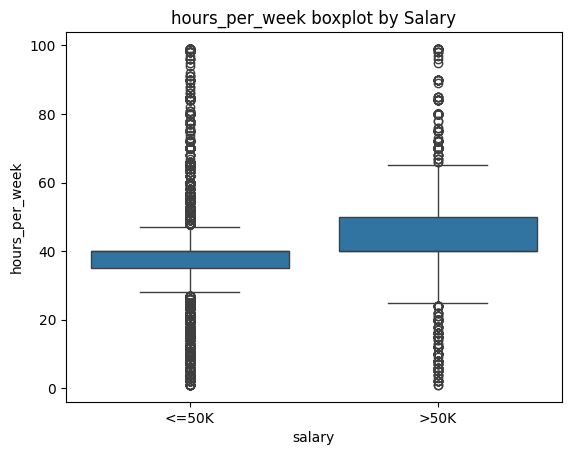

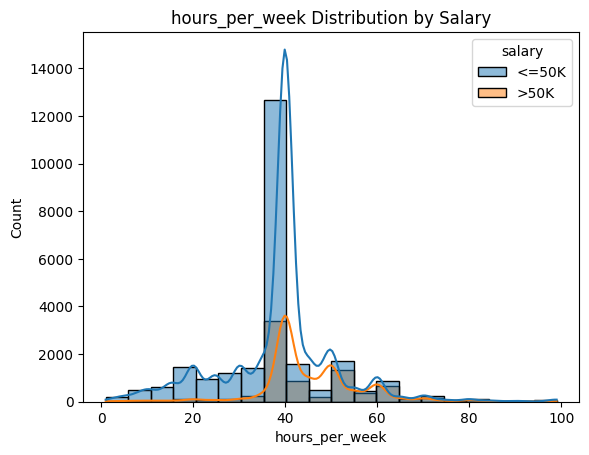

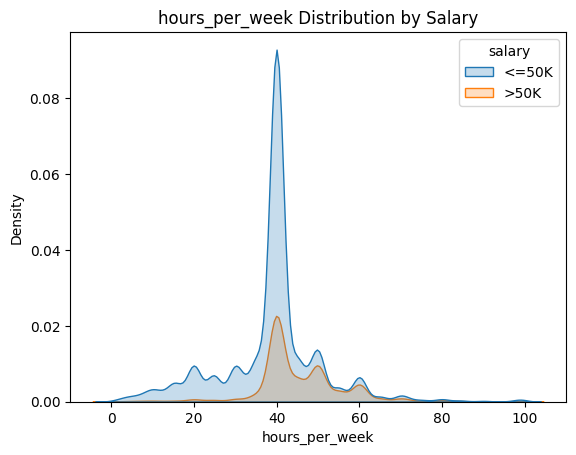

,count,mean,std,min,25%,50%,75%,max
salary,,,,,,,,
<=50K,24698.0,38.842862,12.318286,1.0,35.0,40.0,40.0,99.0
>50K,7839.0,45.473402,11.014165,1.0,40.0,40.0,50.0,99.0


In [ ]:
sns.boxplot(x=data.salary, y=data.hours_per_week)
plt.title("hours_per_week boxplot by Salary")
plt.show()

sns.histplot(x=data.hours_per_week, hue=data.salary, bins=20, kde=True)
plt.title("hours_per_week Distribution by Salary")
plt.show()

sns.kdeplot(x=data.hours_per_week, hue=data.salary, fill=True)
plt.title("hours_per_week Distribution by Salary")
plt.show()

data.groupby('salary')['hours_per_week'].describe()


#### RESULT: From this analysis i see that both salary groups work maximum hours.

<Figure size 1920x1440 with 0 Axes>

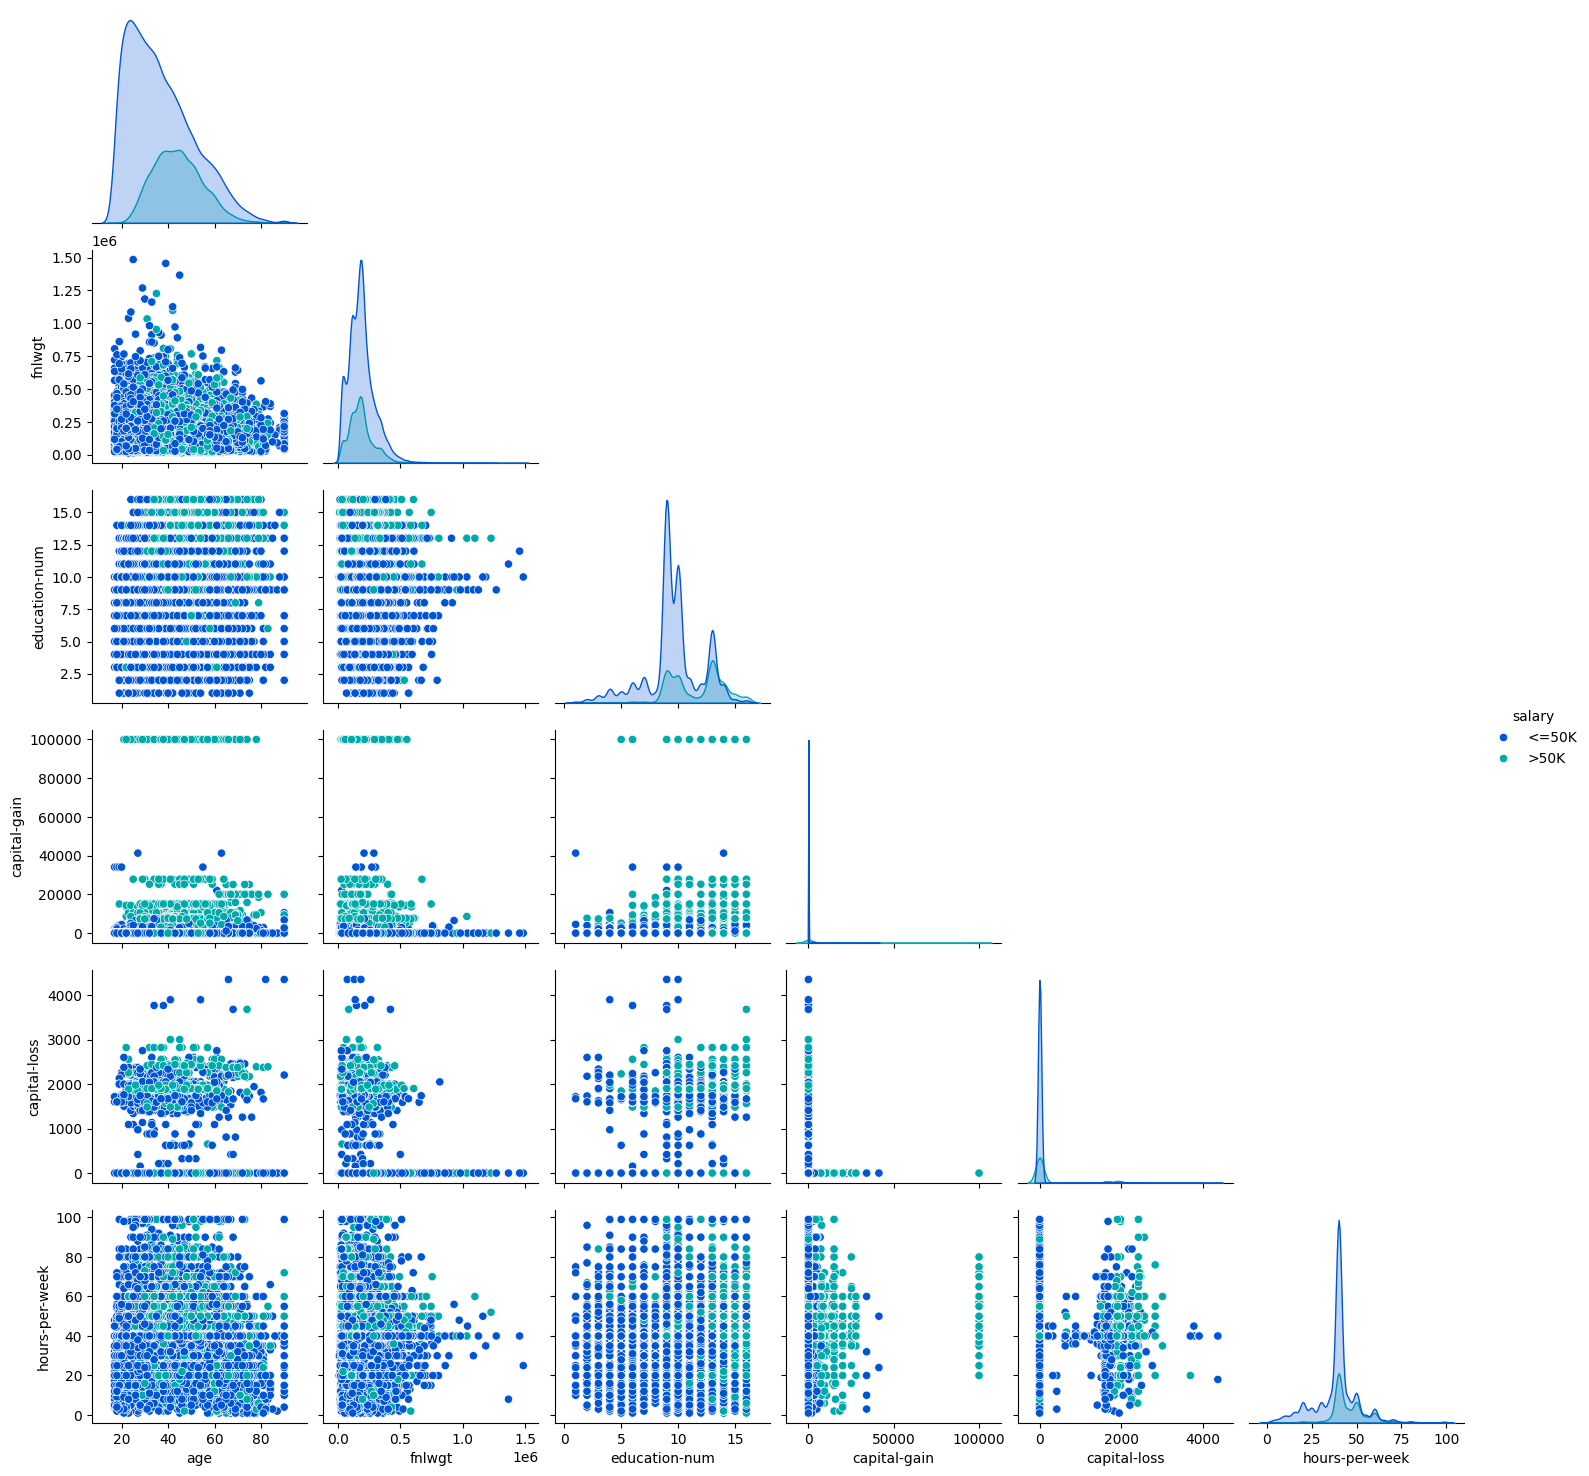

In [ ]:
plt.figure(dpi=300)
sns.pairplot(data=data, corner=True, hue="salary", palette="winter");

In [ ]:
import pandas as pd
import numpy as np


data = pd.read_csv("/content/drive/MyDrive/EDA_UScitizens/adult_eda.csv")


data.head()


,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,salary
0,39,State-gov,77516,Bachelors,13.0,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13.0,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9.0,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7.0,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13.0,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
